accuracy : 1.0


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


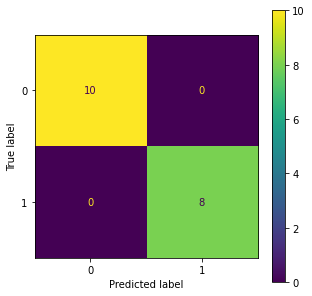

In [11]:
from sklearn import preprocessing
from sklearn import svm
import pickle
from joblib import dump
from features_functions import compute_features
from sklearn.model_selection import train_test_split

import os
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score


nbr_fichiers = 58
learningFeatures = np.empty((nbr_fichiers, 71))
folder_path = r"C:\Users\utilisateur\brief_18_audio-main\notebook_audio\Data"
count_files = 0

learningLabels = []


for k, filename in enumerate(os.listdir(folder_path)):
    # vérifier si le fichier est un fichier .wav
    if filename.endswith(".wav"):
        # lire le fichier audio
        sr, input_sig = read(os.path.join(folder_path, filename))
        input_sig = input_sig.astype(np.float32)/32768

        # Compute the signal in three domains
        sig_sq = input_sig**2
        sig_t = input_sig / np.sqrt(sig_sq.sum())
        sig_f = np.absolute(np.fft.fft(sig_t))
        sig_c = np.absolute(np.fft.fft(sig_f))

        # Compute the features and store them
        features_list = []
        N_feat, features_list = compute_features(sig_t, sig_f[:sig_t.shape[0]//2], sig_c[:sig_t.shape[0]//2])
        features_vector = np.array(features_list)[np.newaxis,:]
        
         # Store the obtained features in a np.arrays
        learningFeatures[k,:] = features_vector

        # Store the labels
        if count_files < nbr_fichiers//2:
            learningLabels.append(0)
        else:
            learningLabels.append(1)   
        count_files+=1

        

X_train, X_test, y_train, y_test = train_test_split(learningFeatures, learningLabels, test_size=0.30, random_state=10)

# Standardize the labels
# labelEncoder = preprocessing.LabelEncoder().fit(y_train)
# learningLabelsStd = labelEncoder.transform(y_train)
# testLabelsStd = labelEncoder.transform(y_test)

# Learn the model
model = svm.SVC(C=10, kernel='linear', class_weight=None, probability=False)
scaler = preprocessing.StandardScaler(with_mean=True).fit(X_train)
learningFeatures_scaled = scaler.transform(X_train)

model.fit(learningFeatures_scaled, y_train)

# Test the model
testFeatures_scaled = scaler.transform(X_test)

y_pred = model.predict(testFeatures_scaled)
print(f"accuracy : {accuracy_score(y_test, y_pred)}")

# Matrix confusion
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(model, testFeatures_scaled, y_test, ax=ax) 
plt.show()

fig.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')

# Export the scaler and model on disk
# dump(scaler, "SCALER")
# dump(model, "SVM_MODEL")

In [68]:
learningFeatures.shape

(58, 71)